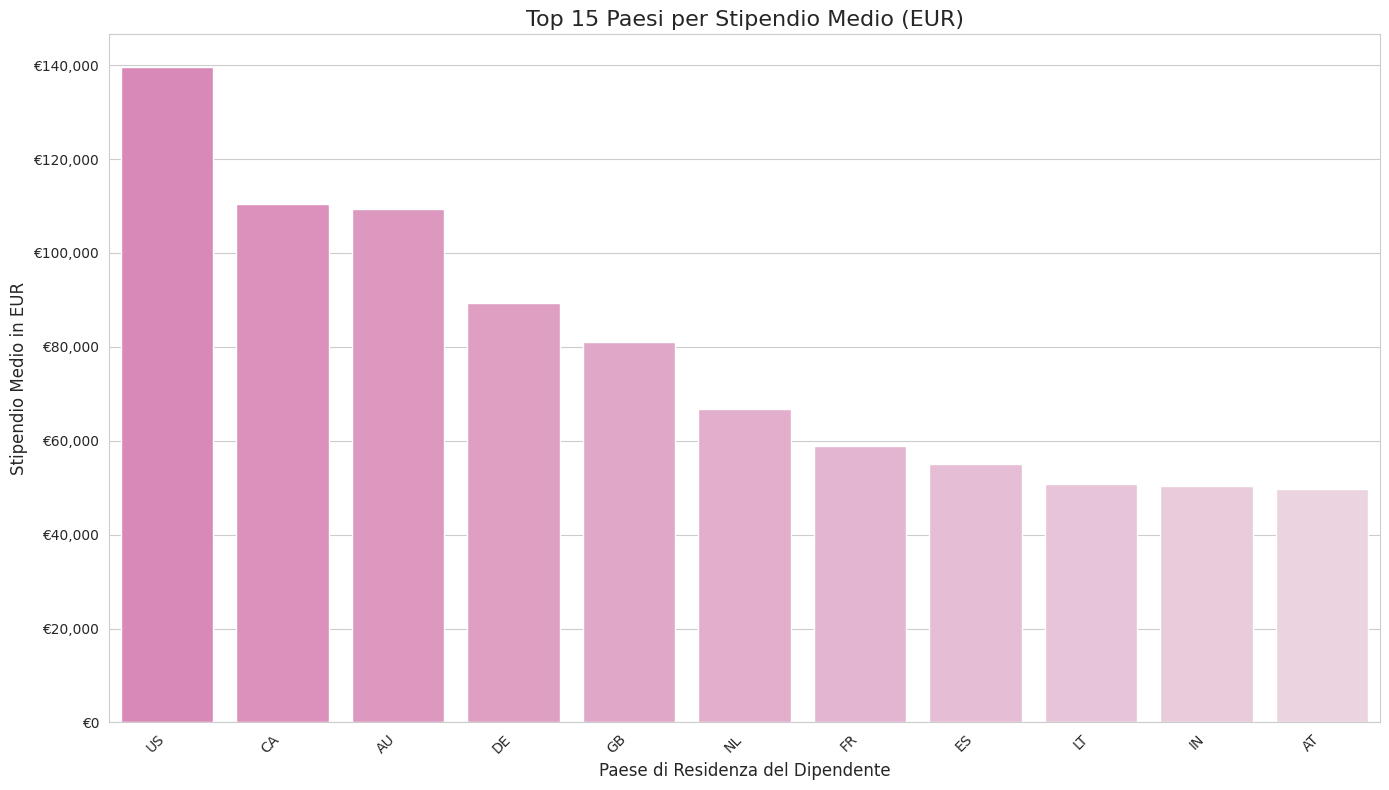

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

exchange_rate_usd_to_eur = 0.851385
try:
    df = pd.read_csv('/kaggle/input/salaries-for-data-science-jobs/salaries.csv')
except FileNotFoundError:
    print("Errore: File 'salaries.csv' non trovato.")
    exit()

df['salary_in_eur'] = df['salary_in_usd'] * exchange_rate_usd_to_eur

country_counts = df['employee_residence'].value_counts()
significant_countries = country_counts[country_counts > 250].index
df_significant = df[df['employee_residence'].isin(significant_countries)]

top_countries = df_significant.groupby('employee_residence')['salary_in_eur'].mean().sort_values(ascending=False).head(15)

sns.set_style("whitegrid")

base_color = "#e67cb9"
custom_palette = sns.light_palette(base_color, n_colors=15, reverse=True)

plt.figure(figsize=(14, 8))
sns.barplot(
    x=top_countries.index,
    y=top_countries.values,
    palette=custom_palette
)

plt.title('Top 15 Paesi per Stipendio Medio (EUR)', fontsize=16)
plt.xlabel('Paese di Residenza del Dipendente', fontsize=12)
plt.ylabel('Stipendio Medio in EUR', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda y, p: f'€{int(y):,}')
)

plt.tight_layout()
plt.savefig("stipendio medio per paese.png")
plt.show()